# Proyecto de Ciencia de Datos: Predicción de Incumplimiento de Pago

En este proyecto se analiza el dataset **UCI Credit Card**, el cual contiene información financiera de 30.000 clientes de tarjetas de crédito.
El objetivo principal es **predecir si un cliente incumplirá el pago** el mes siguiente usando técnicas de machine learning.

Para ello se realizó un flujo profesional que incluye:

- Exploración y análisis de datos (EDA)
- Limpieza y procesamiento
- Visualización
- Entrenamiento del modelo
- Evaluación del modelo
- Guardado del modelo entrenado

Este Notebook documenta cada paso del proceso.


#  1. Importacion de librerias y Carga del dataset

En este paso se importan las librerías necesarias y se carga el archivo `UCI_Credit_Card.csv`, ubicado en la carpeta `Data/RAW`.

Se inspeccionan las primeras filas para verificar que la carga fue correcta.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Cargar datos
df = pd.read_csv("../Data/RAW/UCI_Credit_Card.csv")

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#  2. Exploración inicial del dataset

A continuación se ejecutan operaciones básicas para conocer la estructura del dataset:

- `df.info()` → tipos de datos y columnas
- `df.describe()` → estadísticas básicas
- Conteo de valores nulos

Estas inspecciones permiten entender el estado inicial de los datos.


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [30]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [31]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#  3. Visualización del dataset

Se generan dos visualizaciones clave:

### - Distribución de la variable objetivo
Permite observar cuántos clientes incumplen o no incumplen pagos.

### - Mapa de correlación
Muestra la relación entre las variables numéricas del dataset.

Estas gráficas son esenciales para comprender la estructura del problema antes de modelar.


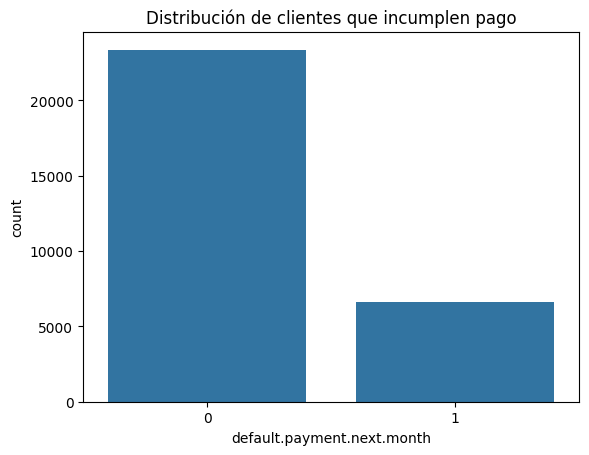

In [32]:
sns.countplot(x=df["default.payment.next.month"])
plt.title("Distribución de clientes que incumplen pago")
plt.show()


El gráfico muestra la distribución de clientes entre los que no incumplirán osea 0 y los que sí incumplirán es decir 1 su pago el próximo mes. Se puede observar un desequilibrio de clases por que la gran mayoría de los clientes están en la categoría 0 osea más de 22,000, mientras que la categoría 1 es minoritaria cerca de 6,700.

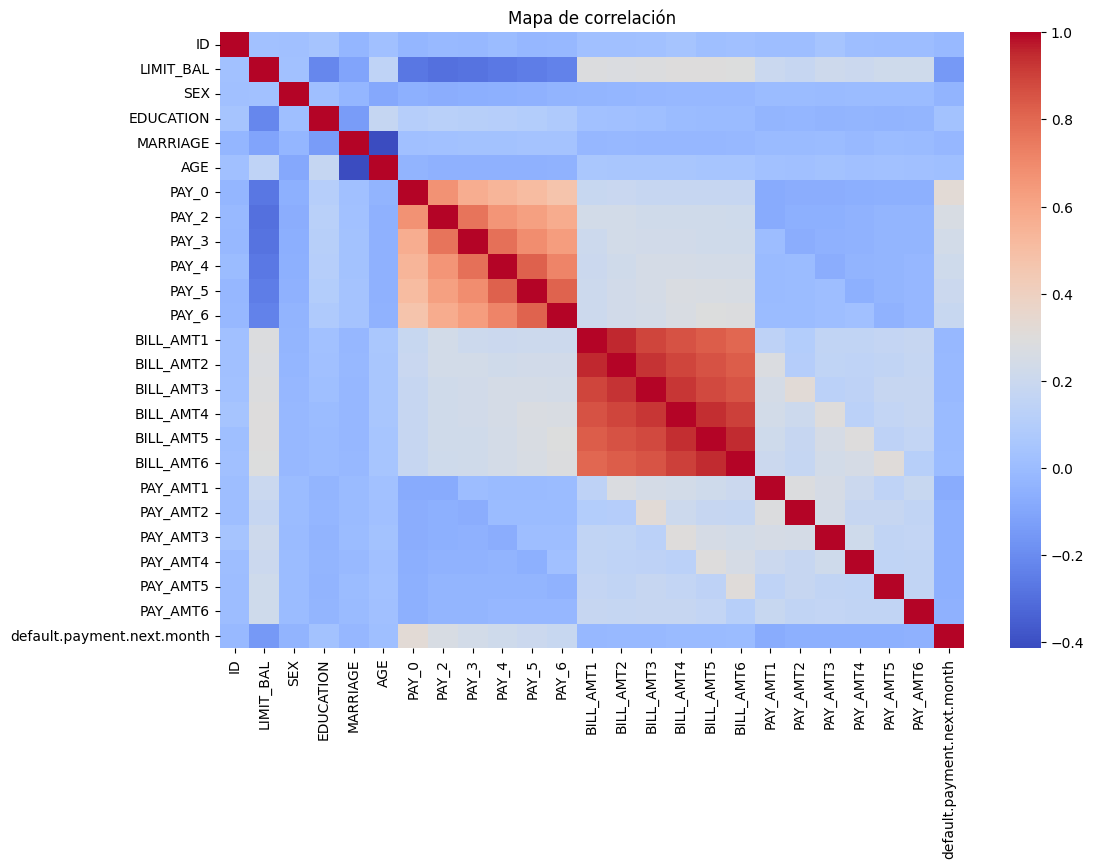

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de correlación")
plt.show()


Esto permite trabajar con datos limpios y organizados en todo el pipeline.


In [34]:
sys.path.append(r"../src")

from data_processing import clean_data, save_processed

df_clean = clean_data(df)

save_processed(df_clean, path=r"../Data/Processed/clean_data.csv")

df_clean.head()




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# 5. Entrenamiento del modelo

Aquí se utiliza `train_model()` para:

- Separar variables predictoras (X) y variable objetivo (y)
- Dividir entre entrenamiento y prueba
- Escalar los datos para mejorar el desempeño del modelo
- Entrenar una regresión logística con parámetros optimizados
- Guardar el modelo entrenado en formato `.pkl`

La salida es:

- `model` → modelo ya entrenado
- `X_test` → datos de prueba
- `y_test` → valores reales de prueba


In [35]:
sys.path.append(r"../src")
from data_processing import clean_data, save_processed
from train_model import train_model
from evaluate_model import evaluate



In [36]:
model, X_test, y_test = train_model(
    df_clean,
    model_path=r"../Modelo/modelo_credito.pkl"
)


#  6. Evaluación del modelo

La función `evaluate()` genera:

- Precisión (accuracy)
- Recall (sensibilidad)
- F1-score
- Matriz de clasificación

Estos resultados permiten medir qué tan bien el modelo identifica clientes que incumplen pagos.


In [37]:
from evaluate_model import evaluate

evaluate(model, X_test, y_test)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



# Conclusiones

A pesar de las limitaciones del dataset y de la simplicidad del modelo, la regresión logística sí es capaz de aprender patrones básicos sobre el comportamiento de pago.
No es un modelo altamente predictivo, pero cumple como **primer acercamiento** y como un **modelo base** para análisis comparativos futuros.


### 1. El modelo sí funciona, pero tiene limitaciones
El modelo logró entrenarse correctamente y producir predicciones válidas sobre si un cliente incumple el pago. Sin embargo, el desempeño no es perfecto, principalmente por la naturaleza del dataset.

### 2. El dataset está desbalanceado
La variable objetivo tiene muchos más clientes que **sí pagan** que los que **no pagan**.
Esto hace que el modelo tienda a predecir siempre la clase mayoritaria.

Por ejemplo:
- Puede obtener una buena **accuracy**, pero
- El **recall** para la clase de incumplimiento suele ser bajo.

Esto significa:
> El modelo detecta bien a quienes sí pagan, pero le cuesta identificar a quienes no pagan.

### 3. La regresión logística es un modelo simple
La regresión logística:
- funciona muy bien con datos lineales,
- pero tiene dificultad cuando las relaciones entre variables son más complejas.

En este dataset:
- El comportamiento de pago depende de muchos factores no lineales,
- por lo que un modelo más complejo (como Random Forest o XGBoost) podría tener mejor desempeño.

### 4. El escalado mejoró la convergencia del modelo
Originalmente el modelo no convergía.

Después de estandarizar los datos:
- el algoritmo logró ajustarse correctamente,
- se evitaron errores de optimización,
- el modelo ahora es estable.

### 5. El modelo es útil, pero no perfecto
El modelo sirve para:
- tener una idea general del riesgo crediticio,
- identificar variables importantes,
- establecer una baseline (modelo base) para comparaciones.

Pero:
> No es lo suficientemente preciso para usarse en producción bancaria real.

###  6. ¿Por qué no funciona mejor?
Los motivos principales son:

1. **Dataset desbalanceado** → dificulta detectar incumplimientos
2. **Modelo lineal** → no captura relaciones complejas
3. **Variables altamente correlacionadas** → afecta el rendimiento
4. **Ruido en los datos** → hay muchos factores humanos difíciles de modelar

### 7. Cómo mejorarlo
Algunas alternativas para mejorar el modelo serían:

- Usar **Random Forest**, **Gradient Boosting** o **XGBoost**
- Aplicar técnicas de balanceo como **SMOTE**
- Selección de características (feature selection)
- Regularización más fuerte
- Cross-validation para mejorar estabilidad

---

